# Regression Trees

To investigate regession trees we will start with a familiar housing example.  Next, we move to investigate stock data acquired from Quandl.  There is a python module to handle calls to quandl, be sure to install with:

```
pip install quandl
```

We will discuss getting the API key later.  Now, let's run through a quick Regression tree on the California Housing dataset in scikitlearn.

In [1]:
#!pip install quandl

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [3]:
cali = fetch_california_housing()

In [4]:
X = cali.data
y = cali.target
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [5]:
tree = DecisionTreeRegressor(max_depth = 3)

In [6]:
tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [7]:
pred = tree.predict(X_test)
np.sqrt(mean_squared_error(pred, y_test))

0.7939640989104682

In [8]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
np.sqrt(mean_squared_error(pred, y_test))

0.7127428972986503

In [9]:
from sklearn.tree import export_graphviz

In [10]:
export_graphviz(tree, out_file = "tree.dot", feature_names=cali.feature_names)

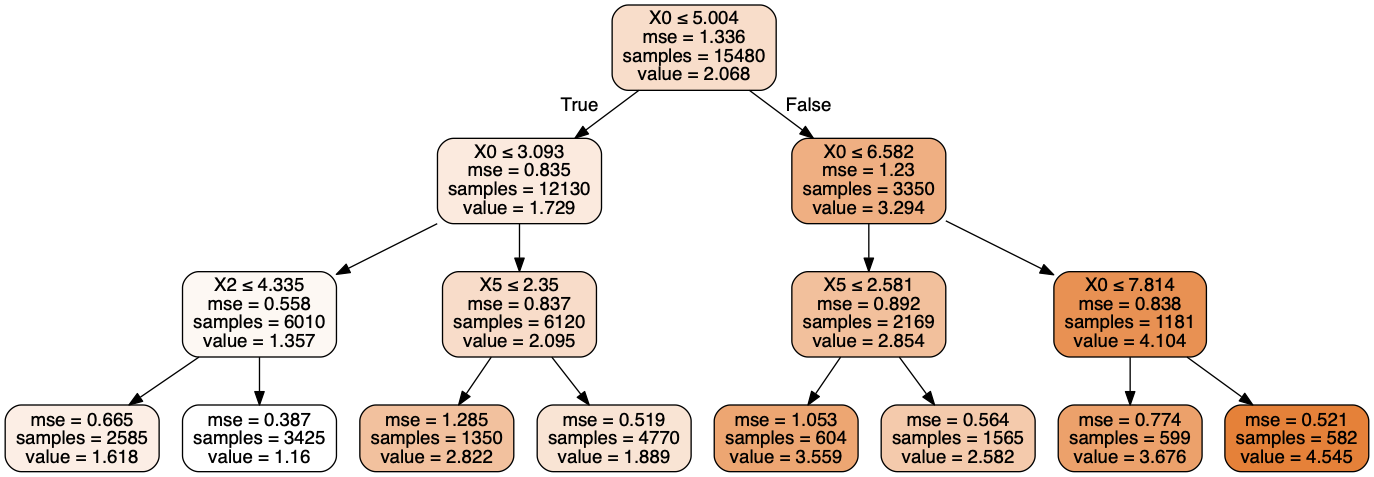

In [13]:
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [14]:
cali.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

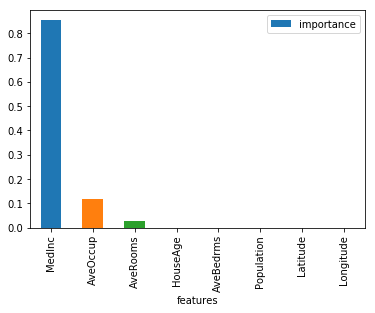

In [15]:
pd.DataFrame({'features': cali.feature_names, 'importance': tree.feature_importances_}).sort_values('importance', ascending = False).plot.bar('features', 'importance')

In [16]:
print(cali.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

### Quandl Stock Data

To obtain your API key, please go to the Quandl documentation [here](https://docs.quandl.com/docs#section-authentication).  

![](images/quandl.png)

In [18]:
!pip install quandl

  Running setup.py bdist_wheel for inflection ... done
  Stored in directory: /Users/NYCMath/Library/Caches/pip/wheels/9f/5a/d3/6fc3bf6516d2a3eb7e18f9f28b472110b59325f3f258fe9211
Successfully built inflection


In [19]:
import quandl
quandl.ApiConfig.api_key = 'YM-RT4CFETsfzRzTNXKt'

In [20]:
data = quandl.get_table('WIKI/PRICES', ticker = ['AAPL'], 
                        qopts = { 'columns': ['ticker', 'date', 'adj_close'] }, 
                        date = { 'gte': '2012-12-31', 'lte': '2018-07-31' }, 
                        paginate=True)
data.head()

,ticker,date,adj_close
None,,,
0,AAPL,2018-03-27,168.340
1,AAPL,2018-03-26,172.770
2,AAPL,2018-03-23,164.940
3,AAPL,2018-03-22,168.845
4,AAPL,2018-03-21,171.270


In [21]:
data.set_index('date', inplace=True)

In [22]:
data.pivot(columns = 'ticker').head()

,adj_close
ticker,AAPL
date,
2012-12-31,69.009795
2013-01-02,71.195748
2013-01-03,70.296565
2013-01-04,68.338996
2013-01-07,67.937002


Below are the parameters for queries to Quandl:

<table>
<thead>
<tr>
<th>Parameter</th>
<th>Required</th>
<th>Type</th>
<th>Values</th>
<th>Description</th>
</tr>
</thead>
<tbody>
<tr>
<td>database_code</td>
<td>yes</td>
<td>string</td>
<td></td>
<td>Code identifying the database to which the dataset belongs.</td>
</tr>
<tr>
<td>dataset_code</td>
<td>yes</td>
<td>string</td>
<td></td>
<td>Code identifying the dataset.</td>
</tr>
<tr>
<td>limit</td>
<td>no</td>
<td>int</td>
<td></td>
<td>Use <code>limit=n</code> to get the first n rows of the dataset. Use <code>limit=1</code> to get just the latest row.</td>
</tr>
<tr>
<td>column_index</td>
<td>no</td>
<td>int</td>
<td></td>
<td>Request a specific column. Column 0 is the date column and is always returned. Data begins at column 1.</td>
</tr>
<tr>
<td>start_date</td>
<td>no</td>
<td>string</td>
<td>yyyy-mm-dd</td>
<td>Retrieve data rows on and after the specified start date.</td>
</tr>
<tr>
<td>end_date</td>
<td>no</td>
<td>string</td>
<td>yyyy-mm-dd</td>
<td>Retrieve data rows up to and including the specified end date.</td>
</tr>
<tr>
<td>order</td>
<td>no</td>
<td>string</td>
<td>asc<br>desc</td>
<td>Return data in ascending or descending order of date. Default is <code>desc</code>.</td>
</tr>
<tr>
<td>collapse</td>
<td>no</td>
<td>string</td>
<td>none<br>daily<br>weekly<br>monthly<br>quarterly<br>annual</td>
<td>Change the sampling frequency of the returned data. Default is <code>none</code>; i.e., data is returned in its original granularity.</td>
</tr>
<tr>
<td>transform</td>
<td>no</td>
<td>string</td>
<td>none<br>diff<br>rdiff<br>rdiff_from<br>cumul<br>normalize</td>
<td>Perform elementary calculations on the data prior to downloading. Default is <code>none</code>. Calculation options are described below.</td>
</tr>
</tbody>
</table>

In [23]:
data["2016-01"].pivot(columns = 'ticker')

,adj_close
ticker,AAPL
date,
2016-01-04,101.783763
2016-01-05,99.233131
2016-01-06,97.291172
2016-01-07,93.185040
2016-01-08,93.677776
2016-01-11,95.194629
2016-01-12,96.576222
2016-01-13,94.093220


In [24]:
data.loc["2016-01":"2016-02"].pivot(columns = 'ticker')

date


In [25]:
stocks = data.pivot(columns = 'ticker')

In [26]:
stocks.head()

,adj_close
ticker,AAPL
date,
2012-12-31,69.009795
2013-01-02,71.195748
2013-01-03,70.296565
2013-01-04,68.338996
2013-01-07,67.937002


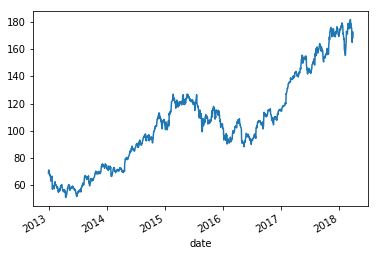

In [27]:
stocks.plot(legend=False)

In [28]:
stocks.iloc[0]

           ticker
adj_close  AAPL      69.009795
Name: 2012-12-31 00:00:00, dtype: float64

In [29]:
stocks.iloc[-1]

           ticker
adj_close  AAPL      168.34
Name: 2018-03-27 00:00:00, dtype: float64

In [30]:
stocks.iloc[-1] - stocks.iloc[0]

           ticker
adj_close  AAPL      99.330205
dtype: float64

In [31]:
#for more on multiple indicies resulting from pivot tables, see
#https://pandas.pydata.org/pandas-docs/version/0.22/reshaping.html
stocks = stocks['adj_close']

In [32]:
stocks.columns

Index(['AAPL'], dtype='object', name='ticker')

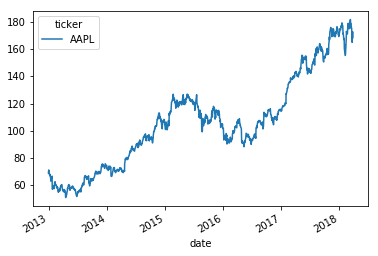

In [33]:
stocks.plot()

In [34]:
stocks.diff().head()

ticker,AAPL
date,
2012-12-31,NaN
2013-01-02,2.185953
2013-01-03,-0.899183
2013-01-04,-1.957569
2013-01-07,-0.401994


In [35]:
diffs = stocks.diff()

### Goal



In [36]:
daily_rtn = stocks.diff()/stocks * 100

In [37]:
daily_rtn[:5]

ticker,AAPL
date,
2012-12-31,NaN
2013-01-02,3.070342
2013-01-03,-1.279128
2013-01-04,-2.864497
2013-01-07,-0.591716


In [38]:
stocks.head(), diffs.head()

(ticker           AAPL
 date                 
 2012-12-31  69.009795
 2013-01-02  71.195748
 2013-01-03  70.296565
 2013-01-04  68.338996
 2013-01-07  67.937002, ticker          AAPL
 date                
 2012-12-31       NaN
 2013-01-02  2.185953
 2013-01-03 -0.899183
 2013-01-04 -1.957569
 2013-01-07 -0.401994)

In [39]:
2/69 * 100

2.898550724637681

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1317 entries, 2018-03-27 to 2012-12-31
Data columns (total 2 columns):
ticker       1317 non-null object
adj_close    1317 non-null float64
dtypes: float64(1), object(1)
memory usage: 70.9+ KB


In [41]:
for i in range(1, 21, 1):
    data.loc[:, 'close_minus' + str(i)] = data['adj_close']
    data20 = data[[x for x in data.columns if 'close_minus' in x or x == 'adj_close']].iloc[20:,]

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1317 entries, 2018-03-27 to 2012-12-31
Data columns (total 22 columns):
ticker           1317 non-null object
adj_close        1317 non-null float64
close_minus1     1317 non-null float64
close_minus2     1317 non-null float64
close_minus3     1317 non-null float64
close_minus4     1317 non-null float64
close_minus5     1317 non-null float64
close_minus6     1317 non-null float64
close_minus7     1317 non-null float64
close_minus8     1317 non-null float64
close_minus9     1317 non-null float64
close_minus10    1317 non-null float64
close_minus11    1317 non-null float64
close_minus12    1317 non-null float64
close_minus13    1317 non-null float64
close_minus14    1317 non-null float64
close_minus15    1317 non-null float64
close_minus16    1317 non-null float64
close_minus17    1317 non-null float64
close_minus18    1317 non-null float64
close_minus19    1317 non-null float64
close_minus20    1317 non-null float64
dtypes: float64(21

In [43]:
data.head()

,ticker,adj_close,close_minus1,close_minus2,close_minus3,close_minus4,close_minus5,close_minus6,close_minus7,close_minus8,...,close_minus11,close_minus12,close_minus13,close_minus14,close_minus15,close_minus16,close_minus17,close_minus18,close_minus19,close_minus20
date,,,,,,,,,,,,,,,,,,,,,
2018-03-27,AAPL,168.340,168.340,168.340,168.340,168.340,168.340,168.340,168.340,168.340,...,168.340,168.340,168.340,168.340,168.340,168.340,168.340,168.340,168.340,168.340
2018-03-26,AAPL,172.770,172.770,172.770,172.770,172.770,172.770,172.770,172.770,172.770,...,172.770,172.770,172.770,172.770,172.770,172.770,172.770,172.770,172.770,172.770
2018-03-23,AAPL,164.940,164.940,164.940,164.940,164.940,164.940,164.940,164.940,164.940,...,164.940,164.940,164.940,164.940,164.940,164.940,164.940,164.940,164.940,164.940
2018-03-22,AAPL,168.845,168.845,168.845,168.845,168.845,168.845,168.845,168.845,168.845,...,168.845,168.845,168.845,168.845,168.845,168.845,168.845,168.845,168.845,168.845
2018-03-21,AAPL,171.270,171.270,171.270,171.270,171.270,171.270,171.270,171.270,171.270,...,171.270,171.270,171.270,171.270,171.270,171.270,171.270,171.270,171.270,171.270


In [44]:
sp20 = data.iloc[:, ::-1]

In [45]:
sp20.head()

,close_minus20,close_minus19,close_minus18,close_minus17,close_minus16,close_minus15,close_minus14,close_minus13,close_minus12,close_minus11,...,close_minus8,close_minus7,close_minus6,close_minus5,close_minus4,close_minus3,close_minus2,close_minus1,adj_close,ticker
date,,,,,,,,,,,,,,,,,,,,,
2018-03-27,168.340,168.340,168.340,168.340,168.340,168.340,168.340,168.340,168.340,168.340,...,168.340,168.340,168.340,168.340,168.340,168.340,168.340,168.340,168.340,AAPL
2018-03-26,172.770,172.770,172.770,172.770,172.770,172.770,172.770,172.770,172.770,172.770,...,172.770,172.770,172.770,172.770,172.770,172.770,172.770,172.770,172.770,AAPL
2018-03-23,164.940,164.940,164.940,164.940,164.940,164.940,164.940,164.940,164.940,164.940,...,164.940,164.940,164.940,164.940,164.940,164.940,164.940,164.940,164.940,AAPL
2018-03-22,168.845,168.845,168.845,168.845,168.845,168.845,168.845,168.845,168.845,168.845,...,168.845,168.845,168.845,168.845,168.845,168.845,168.845,168.845,168.845,AAPL
2018-03-21,171.270,171.270,171.270,171.270,171.270,171.270,171.270,171.270,171.270,171.270,...,171.270,171.270,171.270,171.270,171.270,171.270,171.270,171.270,171.270,AAPL


In [46]:
sp20.shape

(1317, 22)

In [47]:
X_train = sp20[:-1300].drop(['ticker', 'adj_close'], axis = 1)
X_test = sp20[-1300:].drop(['ticker', 'adj_close'], axis = 1)
y_train = sp20['adj_close'].shift(-1)[:-1300]
y_test = sp20['adj_close'].shift(-1)[-1300:]

In [48]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

In [49]:
y_test.shape

(1300,)

In [50]:
X_test.shape

(1300, 20)

In [51]:
lr.score(X_test, y_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [52]:
X_test = X_test[:-1]
y_test.dropna(inplace = True)
X_test.shape, y_test.shape

((1299, 20), (1299,))

In [63]:
lr.score(X_test, y_test)
np.sqrt(mean_squared_error(tree.predict(X_test), y_test))

71.52632947990976

In [64]:
np.sqrt(mean_squared_error(lr.predict(X_test), y_test))

26.246247989019306

In [65]:
np.sqrt(mean_squared_error(lr.predict(X_train), y_train))

3.06719351886065

In [66]:
tree = DecisionTreeRegressor(max_depth=10)
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)

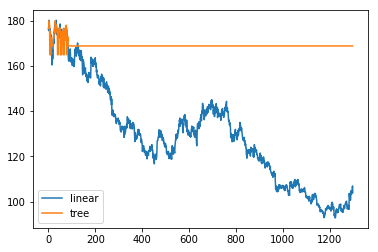

In [67]:
plt.plot(pred, label = 'linear')
plt.plot(tree_pred, label = 'tree')

plt.legend()

In [68]:
X_train.describe()

,close_minus20,close_minus19,close_minus18,close_minus17,close_minus16,close_minus15,close_minus14,close_minus13,close_minus12,close_minus11,close_minus10,close_minus9,close_minus8,close_minus7,close_minus6,close_minus5,close_minus4,close_minus3,close_minus2,close_minus1
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,175.232059,175.232059,175.232059,175.232059,175.232059,175.232059,175.232059,175.232059,175.232059,175.232059,175.232059,175.232059,175.232059,175.232059,175.232059,175.232059,175.232059,175.232059,175.232059,175.232059
std,4.612233,4.612233,4.612233,4.612233,4.612233,4.612233,4.612233,4.612233,4.612233,4.612233,4.612233,4.612233,4.612233,4.612233,4.612233,4.612233,4.612233,4.612233,4.612233,4.612233
min,164.940000,164.940000,164.940000,164.940000,164.940000,164.940000,164.940000,164.940000,164.940000,164.940000,164.940000,164.940000,164.940000,164.940000,164.940000,164.940000,164.940000,164.940000,164.940000,164.940000
25%,172.770000,172.770000,172.770000,172.770000,172.770000,172.770000,172.770000,172.770000,172.770000,172.770000,172.770000,172.770000,172.770000,172.770000,172.770000,172.770000,172.770000,172.770000,172.770000,172.770000
50%,176.670000,176.670000,176.670000,176.670000,176.670000,176.670000,176.670000,176.670000,176.670000,176.670000,176.670000,176.670000,176.670000,176.670000,176.670000,176.670000,176.670000,176.670000,176.670000,176.670000
75%,178.440000,178.440000,178.440000,178.440000,178.440000,178.440000,178.440000,178.440000,178.440000,178.440000,178.440000,178.440000,178.440000,178.440000,178.440000,178.440000,178.440000,178.440000,178.440000,178.440000
max,181.720000,181.720000,181.720000,181.720000,181.720000,181.720000,181.720000,181.720000,181.720000,181.720000,181.720000,181.720000,181.720000,181.720000,181.720000,181.720000,181.720000,181.720000,181.720000,181.720000


In [69]:
tree_pred.max()

179.97

In [70]:
pred[::20]

array([176.16599332, 170.64571633, 171.93683183, 174.57032737,
       172.43104958, 163.55575218, 167.02298518, 166.75264353,
       155.25601264, 154.64651147, 163.62805302, 151.87434872,
       151.19143327, 149.6197147 , 138.83131099, 134.3743881 ,
       131.57766207, 136.13872423, 134.9980724 , 129.93811943,
       125.75222646, 120.24539771, 123.43603465, 118.63614451,
       131.07229646, 125.55804183, 121.24651675, 124.19656588,
       135.68933282, 138.07048733, 130.31913431, 132.88109445,
       133.08105286, 142.45058971, 139.31705393, 141.94819745,
       139.26019791, 140.55994556, 144.33167013, 130.06445574,
       130.20899877, 133.69504212, 124.75258423, 122.14464138,
       123.24473898, 118.68215653, 118.49240136, 116.66794054,
       111.50870938, 105.78512049, 107.15946142, 105.41010196,
       106.28761511, 107.725543  , 104.28910561, 101.79203626,
        99.22308374, 103.19567753,  95.53161338,  94.73185632,
        96.79504331,  93.76250415,  97.63298001,  97.04

In [71]:
tree_pred[::20]

array([176.82 , 172.77 , 164.94 , 171.27 , 172.77 , 168.845, 168.845,
       168.845, 168.845, 168.845, 168.845, 168.845, 168.845, 168.845,
       168.845, 168.845, 168.845, 168.845, 168.845, 168.845, 168.845,
       168.845, 168.845, 168.845, 168.845, 168.845, 168.845, 168.845,
       168.845, 168.845, 168.845, 168.845, 168.845, 168.845, 168.845,
       168.845, 168.845, 168.845, 168.845, 168.845, 168.845, 168.845,
       168.845, 168.845, 168.845, 168.845, 168.845, 168.845, 168.845,
       168.845, 168.845, 168.845, 168.845, 168.845, 168.845, 168.845,
       168.845, 168.845, 168.845, 168.845, 168.845, 168.845, 168.845,
       168.845, 168.845])